# Digital Demodulation of RAW signal

All the notation & argument naming follows Blais review paper

$$
\begin{align}
\hat{V}_{I}(t) & = V_{\text{IF}}\Big[ \hat{X}_{f}(t)\cos(\omega_{\text{IF}}t)-\hat{P_{f}}(t)\sin(\omega_{\text{IF}}t)\Big] + \hat{V}_{\text{noise},t}(t) \\ \\
\hat{V}_{Q}(t) & = -V_{\text{IF}}\Big[ \hat{P}_{f}(t)\cos(\omega_{\text{IF}}t)+\hat{X_{f}}(t)\sin(\omega_{\text{IF}}t)\Big] + \hat{V}_{\text{noise},t}(t)

\end{align}
$$

$$
\begin{equation}
\hat{X}_f = \frac{\hat{a}^\dagger_f + \hat{a}_f}{2}, 
\quad 
\hat{P}_f = \frac{i(\hat{a}^\dagger_f - \hat{a}_f)}{2},
\end{equation}
$$

$$
\begin{bmatrix}
X_{f}(t) \\
P_{f}(t)
\end{bmatrix}
= R^{-1}(t)
\begin{bmatrix}
V_{I}(t) \\
V_{Q}(t)
\end{bmatrix} 

$$

In [1]:
import numpy as np
from pprint import pprint


from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
#from laboneq.contrib.example_helpers.generate_device_setup import generate_device_setup
from laboneq.dsl.device import DeviceSetup




descriptor = generate_descriptor(
    #pqsc=[""], # 장비 여러개 사용시
    shfqc_6=["DEV12256"],
    number_data_qubits=1,
    multiplex=True,
    number_multiplex=1,
    include_cr_lines=True,
    include_ef_lines=True,
    get_zsync=False,  # Only set to True when using real device
    save = False,
    filename="KAIST",
    ip_address="192.168.0.83"
)


#descriptor
setup = DeviceSetup.from_descriptor(yaml_text=descriptor, server_host="192.168.0.83")
#setup
setup.instruments[0].device_options = 'SHFQC/PLUS/QC6CH'
#setup.instruments

In [2]:
from qpu_types import TransmonQubit, TransmonQubitParameters
from helper import load_qubit_parameters, save_qubit_parameters
from operations import TransmonOperations
from laboneq.dsl.quantum.qpu import QPU, QuantumPlatform


#1 Create Initial QuantumElement
qubits = TransmonQubit.from_device_setup(setup) # Also can be done with load_qubit_parameters 

#2 Load existing QuantumElement
#_loaded_qubits = load_qubit_parameters(filename="20250909-2310_KAIST_TG_0909") 
#qubits = list(_loaded_qubits.values())


qpu = QPU(quantum_elements=qubits, quantum_operations=TransmonOperations())
#quantum_platform = QuantumPlatform(setup=setup, qpu=qpu)

# qpu.topology.add_edge("bus", "q16", "q17")
# qpu.topology.add_edge("bus", "q17", "q18")
# qpu.topology.add_edge("bus", "q18", "q19")
# qpu.topology.plot()


from laboneq.simple import workflow
folder_store = workflow.logbook.FolderStore("./experiment_store") 
folder_store.activate()
#folder_store.deactivate()
#workflow.logbook.LoggingStore().activate()
#workflow.logbook.LogbookStore().deactivate()


In [3]:
qubits[0].parameters.resonance_frequency_ge = 5.65e9
qubits[0].parameters.drive_lo_frequency = 5.6e9

qubits[0].parameters.readout_resonator_frequency = 7.12e9
qubits[0].parameters.readout_lo_frequency =7.0e9

In [4]:
from laboneq.simple import Session
session = Session(setup)
session.connect(ignore_version_mismatch=True, do_emulation=True)
#session.disconnect()

[2025.09.10 16:37:20.829] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is /Users/yalgaeahn/JSAHN/qubit-experiment/examples/laboneq_output/log
[2025.09.10 16:37:20.830] INFO    VERSION: laboneq 2.58.0
[2025.09.10 16:37:20.831] INFO    Connecting to data server at 192.168.0.83:8004
[2025.09.10 16:37:20.832] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at 192.168.0.83:8004
[2025.09.10 16:37:20.833] INFO    Configuring the device setup
[2025.09.10 16:37:20.834] INFO    The device setup is configured


# IQ Traj

To plot trajectory 

AcquisitionType has to be RAW and AveragingMode has to be cyclic


In [6]:
from experiments import iq_traj
#######################################################################
q = qubits[0]

print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
#######################################################################
options = iq_traj.experiment_workflow.options()
options.count(1024*2)
options.do_analysis(False)

#print(workflow.show_fields(options))

###################################################################
iq = iq_traj.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    options=options,
    states='ge'
)

iq_result = iq.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
#print(iq_result.tasks['analysis_workflow'].output)

DRIVE range (dBm) : 10, READOUT range (dBm) : 5
[2025.09.10 16:37:37.405] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.09.10 16:37:37.406] INFO      Workflow 'iq_traj': execution started at 2025-09-10 07:37:37.405586Z          
[2025.09.10 16:37:37.406] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.09.10 16:37:37.412] INFO    Task 'temporary_qpu': started at 2025-09-10 07:37:37.412473Z
[2025.09.10 16:37:37.413] INFO    Task 'temporary_qpu': ended at 2025-09-10 07:37:37.413114Z
[2025.09.10 16:37:37.414] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2025-09-10 
[2025.09.10 16:37:37.414] INFO    07:37:37.414157Z
[2025.09.10 16:37:37.415] INFO    Task 'temporary_quantum_elements_from_qpu': ended at 2025-09-10 07:37:37.414964Z
[2025.09.10 16:37:37.415] INFO    Task 'create_experiment': started at 2025-09-10 07:37:37.415839Z
[2025.09.10 16:37:37.420] INFO    Task 'create_experi

In [26]:
from laboneq.simple import show_pulse_sheet
from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

show_pulse_sheet(compiled_experiment=iq_result.tasks["compile_experiment"].output,name='test', interactive=True, max_events_to_publish=10000)
#plot_simulation(compiled_experiment=rip_result.tasks["compile_experiment"].output)

[2025.09.10 16:42:13.168] INFO    Recompiling the experiment due to missing extra information in the compiled experiment. Compile with `OUTPUT_EXTRAS=True` and `MAX_EVENTS_TO_PUBLISH=10000` to bypass this step with a small impact on the compilation time.
[2025.09.10 16:42:13.172] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to SOFTWARE
[2025.09.10 16:42:13.173] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.10 16:42:13.173] INFO    Starting LabOne Q Compiler run...
[2025.09.10 16:42:13.196] INFO    Schedule completed. [0.021 s]
[2025.09.10 16:42:13.199] INFO    Code generation completed for all AWGs. [0.003 s]
[2025.09.10 16:42:13.200] INFO    Completed compilation step 1 of 1. [0.025 s]
[2025.09.10 16:42:13.203] INFO    Finished LabOne Q Compiler run.


- For $2\mu s$ acquire we have  2000ns/0.5ns=4000 sample

In [7]:
from pprint import pprint
pprint(qubits[0].readout_integration_parameters())
pprint(qubits[0].readout_parameters())

qubits[0].parameters.readout_integration_delay

('acquire',
 {'discrimination_thresholds': None,
  'kernels': None,
  'kernels_type': 'default',
  'length': 2e-06})
('measure',
 {'amplitude': 1.0,
  'length': 2e-06,
  'pulse': {'function': 'GaussianSquare',
            'risefall_sigma_ratio': 3.0,
            'sigma': 0.2}})


2e-08

In [8]:
iq_result.output.data['q0']

AttributeWrapper(
│   cal_trace=AttributeWrapper(
│   │   e=AcquiredResult(
│   │   │   handle='q0/cal_trace/e',
│   │   │   axis_name=[
│   │   │   │   'samples'
│   │   │   ],
│   │   │   axis=[
│   │   │   │   array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.997e+03, 3.998e+03,
│      3.999e+03], shape=(4000,))
│   │   │   ],
│   │   │   data=array([10.+0.000e+00j, 10.+1.000e+00j, 10.+2.000e+00j, ...,
│      10.+3.997e+03j, 10.+3.998e+03j, 10.+3.999e+03j], shape=(4000,)),
│   │   │   last_nt_step=[]
│   │   ),
│   │   g=AcquiredResult(
│   │   │   handle='q0/cal_trace/g',
│   │   │   axis_name=[
│   │   │   │   'samples'
│   │   │   ],
│   │   │   axis=[
│   │   │   │   array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.997e+03, 3.998e+03,
│      3.999e+03], shape=(4000,))
│   │   │   ],
│   │   │   data=array([0.+0.000e+00j, 0.+1.000e+00j, 0.+2.000e+00j, ..., 0.+3.997e+03j,
│      0.+3.998e+03j, 0.+3.999e+03j], shape=(4000,)),
│   │   │   last_nt_step=[]
│   │   )
│   )
)


In [13]:
e_raw = iq_result.output.data['q0']['cal_trace']['e'].data
I_e = e_raw.real
Q_e = e_raw.imag

g_raw = iq_result.output.data['q0']['cal_trace']['g'].data
axis = iq_result.output.data['q0']['cal_trace']['g'].axis[0]
I_g = g_raw.real
Q_g = g_raw.imag

# Helper function for RAW data processing
Helper function should be designed 

Processing starts with raw complex data  (I_component, Q_component) 

1. separate I, Q signal

2. demoulate signal with IF frequency, IF_freq = target_freq - LO_freq  
    ex) IF = Transmon.drive_frequency_ge





In [14]:
def IF_demodulation(I_data, Q_data, IF_freq):

    I_data = np.array(I_data)
    Q_data = np.array(Q_data)

    coswt = np.cos(2 * np.pi * IF_freq * np.arange(len(I_data))/2 * 1e-9) # reason of 2 ; 2GHz sampling rate
    sinwt = np.sin(2 * np.pi * IF_freq * np.arange(len(Q_data))/2 * 1e-9) 

    # demodulate the data
    I_demod = I_data * coswt + Q_data * sinwt
    Q_demod = -I_data * sinwt + Q_data * coswt

    return I_demod, Q_demod

In [15]:
readout_IF_freq = qubits[0].parameters.readout_frequency

In [27]:
X_g, P_g = IF_demodulation(I_g, Q_g, readout_IF_freq)
X_e, P_e = IF_demodulation(I_e, Q_e, readout_IF_freq)

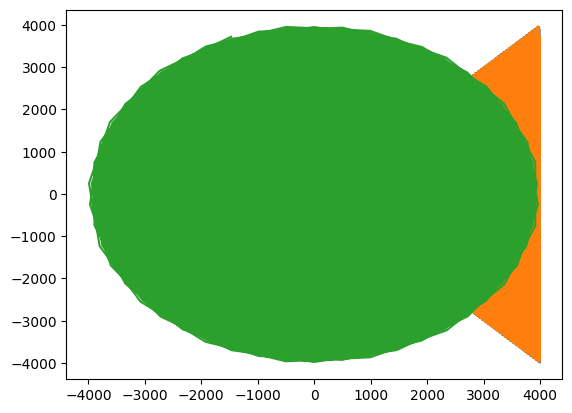

In [25]:
import matplotlib.pyplot as plt
plt.plot(X_g)
plt.plot(P_g)
plt.plot(X_g,P_g)

# Future Works on IQ related module

- iq_traj module should be integrated with iq_blobs

IQ blobs features
- double gaussian fitting for an thermal photon analysis
- confusion matrix 
- discrimination error
